In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv(r"C:\Users\DEEPAK YADAV\Downloads\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
x = data.iloc[:,[3,4]].values

In [11]:
with_cluster_sum_sq = []

In [12]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(x)
    with_cluster_sum_sq.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

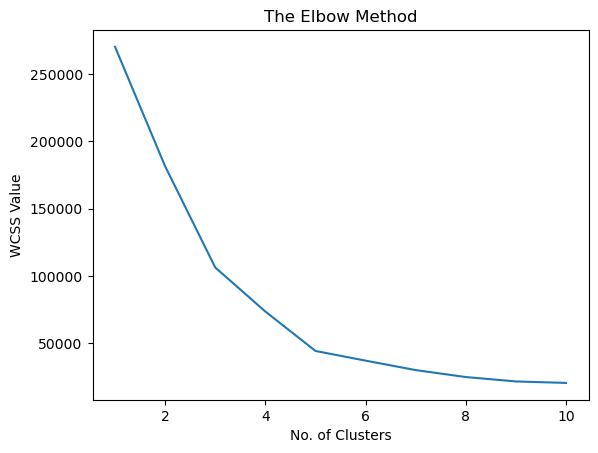

In [15]:
plt.plot(range(1,11),with_cluster_sum_sq)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [17]:
# k = 5 can give a optimal cluster
model = KMeans(n_clusters=5, init= 'k-means++', random_state=0)
y_kmeans = model.fit_predict(x)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


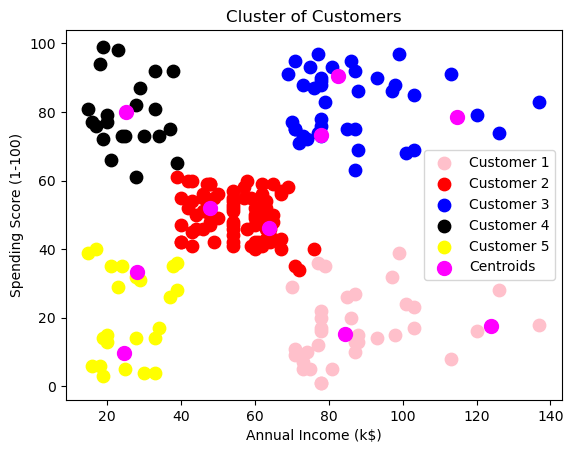

In [18]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans== 0,1], s = 80, c = 'pink', label ='Customer 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans== 1,1], s = 80, c = 'red', label ='Customer 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans== 2,1], s = 80, c = 'blue', label ='Customer 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans== 3,1], s = 80, c = 'black', label ='Customer 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans== 4,1], s = 80, c = 'yellow', label ='Customer 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'magenta', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()